In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency

## Cleaning data for  question 4 

In [2]:
#uploading merged data set

In [3]:
mergeddataset=pd.read_csv(r"C:\Users\DELL\Desktop\Coursework\coursework data set\2006and2007mergeddataset.csv")

In [4]:
#extracting the desired columns for question 4

In [5]:
q4data=mergeddataset[["Year", "Month", "DayofMonth","DepTime", "TailNum", "ArrDelay","DepDelay","Origin", "Dest"]]
q4data

,Year,Month,DayofMonth,DepTime,TailNum,ArrDelay,DepDelay,Origin,Dest
0,2006,1,11,743.0,N657AW,6.0,-2.0,ATL,PHX
1,2006,1,11,1053.0,N834AW,-5.0,0.0,ATL,PHX
2,2006,1,11,1915.0,N605AW,-23.0,0.0,ATL,PHX
3,2006,1,11,1753.0,N312AW,-8.0,-2.0,AUS,PHX
4,2006,1,11,824.0,N309AW,0.0,-8.0,AUS,PHX
...,...,...,...,...,...,...,...,...,...
14595098,2007,12,15,1558.0,N670DN,13.0,-7.0,MCO,ATL
14595099,2007,12,15,1902.0,N829MH,5.0,11.0,ATL,SLC
14595100,2007,12,15,1024.0,N623DL,15.0,-1.0,LAX,ATL
14595101,2007,12,15,1353.0,N970DL,36.0,38.0,DFW,ATL


In [6]:
#making plane tail number equals to 0 a null value

In [7]:
q4data.loc[q4data['TailNum'] == "0", 'TailNum'] = np.nan

In [8]:
#checking for null values

In [9]:
pd.isnull(q4data).sum(axis=0)

Year               0
Month              0
DayofMonth         0
DepTime       282682
TailNum       177966
ArrDelay      316046
DepDelay      282682
Origin             0
Dest               0
dtype: int64

In [10]:
#dropping null values

In [11]:
q4data = q4data.dropna()
q4data

,Year,Month,DayofMonth,DepTime,TailNum,ArrDelay,DepDelay,Origin,Dest
0,2006,1,11,743.0,N657AW,6.0,-2.0,ATL,PHX
1,2006,1,11,1053.0,N834AW,-5.0,0.0,ATL,PHX
2,2006,1,11,1915.0,N605AW,-23.0,0.0,ATL,PHX
3,2006,1,11,1753.0,N312AW,-8.0,-2.0,AUS,PHX
4,2006,1,11,824.0,N309AW,0.0,-8.0,AUS,PHX
...,...,...,...,...,...,...,...,...,...
14595098,2007,12,15,1558.0,N670DN,13.0,-7.0,MCO,ATL
14595099,2007,12,15,1902.0,N829MH,5.0,11.0,ATL,SLC
14595100,2007,12,15,1024.0,N623DL,15.0,-1.0,LAX,ATL
14595101,2007,12,15,1353.0,N970DL,36.0,38.0,DFW,ATL


In [12]:
#rechecking null values

In [13]:
pd.isnull(q4data).sum(axis=0)

Year          0
Month         0
DayofMonth    0
DepTime       0
TailNum       0
ArrDelay      0
DepDelay      0
Origin        0
Dest          0
dtype: int64

In [14]:
q4data.dtypes

Year            int64
Month           int64
DayofMonth      int64
DepTime       float64
TailNum        object
ArrDelay      float64
DepDelay      float64
Origin         object
Dest           object
dtype: object

In [15]:
# adding a column with the date time format 

In [16]:
q4data.loc[:, 'Year'] = q4data['Year'].astype(str)
q4data.loc[:, 'Month'] = q4data['Month'].astype(str)
q4data.loc[:, 'DayofMonth'] = q4data['DayofMonth'].astype(str)
q4data.loc[:, 'DepTime'] = pd.to_timedelta(q4data['DepTime'], unit='h')
q4data['DateTime'] = pd.to_datetime(q4data['Year'] + '-' + q4data['Month'] + '-' + q4data['DayofMonth']) + q4data['DepTime']
q4data

C:\Users\DELL\AppData\Local\Temp\ipykernel_11356\1628702182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q4data.loc[:, 'Year'] = q4data['Year'].astype(str)
C:\Users\DELL\AppData\Local\Temp\ipykernel_11356\1628702182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q4data.loc[:, 'Month'] = q4data['Month'].astype(str)
C:\Users\DELL\AppData\Local\Temp\ipykernel_11356\1628702182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,Year,Month,DayofMonth,DepTime,TailNum,ArrDelay,DepDelay,Origin,Dest,DateTime
0,2006,1,11,30 days 23:00:00,N657AW,6.0,-2.0,ATL,PHX,2006-02-10 23:00:00
1,2006,1,11,43 days 21:00:00,N834AW,-5.0,0.0,ATL,PHX,2006-02-23 21:00:00
2,2006,1,11,79 days 19:00:00,N605AW,-23.0,0.0,ATL,PHX,2006-03-31 19:00:00
3,2006,1,11,73 days 01:00:00,N312AW,-8.0,-2.0,AUS,PHX,2006-03-25 01:00:00
4,2006,1,11,34 days 08:00:00,N309AW,0.0,-8.0,AUS,PHX,2006-02-14 08:00:00
...,...,...,...,...,...,...,...,...,...,...
14595098,2007,12,15,64 days 22:00:00,N670DN,13.0,-7.0,MCO,ATL,2008-02-17 22:00:00
14595099,2007,12,15,79 days 06:00:00,N829MH,5.0,11.0,ATL,SLC,2008-03-03 06:00:00
14595100,2007,12,15,42 days 16:00:00,N623DL,15.0,-1.0,LAX,ATL,2008-01-26 16:00:00
14595101,2007,12,15,56 days 09:00:00,N970DL,36.0,38.0,DFW,ATL,2008-02-09 09:00:00


In [17]:
#calculating total delay 

In [18]:
q4data.loc[:,'TotalDelay'] = q4data['ArrDelay'] + q4data['DepDelay']
q4data

C:\Users\DELL\AppData\Local\Temp\ipykernel_11356\3434988227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q4data.loc[:,'TotalDelay'] = q4data['ArrDelay'] + q4data['DepDelay']


,Year,Month,DayofMonth,DepTime,TailNum,ArrDelay,DepDelay,Origin,Dest,DateTime,TotalDelay
0,2006,1,11,30 days 23:00:00,N657AW,6.0,-2.0,ATL,PHX,2006-02-10 23:00:00,4.0
1,2006,1,11,43 days 21:00:00,N834AW,-5.0,0.0,ATL,PHX,2006-02-23 21:00:00,-5.0
2,2006,1,11,79 days 19:00:00,N605AW,-23.0,0.0,ATL,PHX,2006-03-31 19:00:00,-23.0
3,2006,1,11,73 days 01:00:00,N312AW,-8.0,-2.0,AUS,PHX,2006-03-25 01:00:00,-10.0
4,2006,1,11,34 days 08:00:00,N309AW,0.0,-8.0,AUS,PHX,2006-02-14 08:00:00,-8.0
...,...,...,...,...,...,...,...,...,...,...,...
14595098,2007,12,15,64 days 22:00:00,N670DN,13.0,-7.0,MCO,ATL,2008-02-17 22:00:00,6.0
14595099,2007,12,15,79 days 06:00:00,N829MH,5.0,11.0,ATL,SLC,2008-03-03 06:00:00,16.0
14595100,2007,12,15,42 days 16:00:00,N623DL,15.0,-1.0,LAX,ATL,2008-01-26 16:00:00,14.0
14595101,2007,12,15,56 days 09:00:00,N970DL,36.0,38.0,DFW,ATL,2008-02-09 09:00:00,74.0


In [19]:
#extracting desired columns

In [20]:
q4dataset=q4data[["TailNum","DateTime","Origin","Dest","TotalDelay"]]
q4dataset

,TailNum,DateTime,Origin,Dest,TotalDelay
0,N657AW,2006-02-10 23:00:00,ATL,PHX,4.0
1,N834AW,2006-02-23 21:00:00,ATL,PHX,-5.0
2,N605AW,2006-03-31 19:00:00,ATL,PHX,-23.0
3,N312AW,2006-03-25 01:00:00,AUS,PHX,-10.0
4,N309AW,2006-02-14 08:00:00,AUS,PHX,-8.0
...,...,...,...,...,...
14595098,N670DN,2008-02-17 22:00:00,MCO,ATL,6.0
14595099,N829MH,2008-03-03 06:00:00,ATL,SLC,16.0
14595100,N623DL,2008-01-26 16:00:00,LAX,ATL,14.0
14595101,N970DL,2008-02-09 09:00:00,DFW,ATL,74.0


In [21]:
#grouping according to plane tail number and sorting according to date and time

In [22]:
q4dataset = q4dataset.groupby('TailNum').apply(lambda x: x.sort_values('DateTime'))
q4dataset

TailNum            DateTime Origin Dest  TotalDelay
TailNum                                                             
80009E  7608234   80009E 2007-01-24 03:00:00    PHL  IND       -13.0
        7609450   80009E 2007-01-28 05:00:00    RIC  DTW        39.0
        7609013   80009E 2007-01-31 13:00:00    GSP  MEM         8.0
        7611808   80009E 2007-02-01 01:00:00    ICT  MEM        10.0
        7610350   80009E 2007-02-02 19:00:00    ALO  MSP        26.0
...                  ...                 ...    ...  ...         ...
NHZOAL  14516188  NHZOAL 2008-03-02 16:00:00    KOA  HNL         3.0
        14516297  NHZOAL 2008-03-03 05:00:00    OGG  OAK        12.0
        14516189  NHZOAL 2008-03-06 16:00:00    KOA  HNL        18.0
        14516358  NHZOAL 2008-03-10 17:00:00    OGG  SMF        59.0
        14516182  NHZOAL 2008-03-20 14:00:00    KOA  OAK        92.0

[14278883 rows x 5 columns]

In [23]:
#set the index and make a integer column

In [24]:
q4dataset = q4dataset.set_index('DateTime')
q4dataset

,TailNum,Origin,Dest,TotalDelay
DateTime,,,,
2007-01-24 03:00:00,80009E,PHL,IND,-13.0
2007-01-28 05:00:00,80009E,RIC,DTW,39.0
2007-01-31 13:00:00,80009E,GSP,MEM,8.0
2007-02-01 01:00:00,80009E,ICT,MEM,10.0
2007-02-02 19:00:00,80009E,ALO,MSP,26.0
...,...,...,...,...
2008-03-02 16:00:00,NHZOAL,KOA,HNL,3.0
2008-03-03 05:00:00,NHZOAL,OGG,OAK,12.0
2008-03-06 16:00:00,NHZOAL,KOA,HNL,18.0


In [25]:
# Reset the index and create an integer index

In [26]:
q4dataset = q4dataset.reset_index()

In [27]:
q4dataset

,DateTime,TailNum,Origin,Dest,TotalDelay
0,2007-01-24 03:00:00,80009E,PHL,IND,-13.0
1,2007-01-28 05:00:00,80009E,RIC,DTW,39.0
2,2007-01-31 13:00:00,80009E,GSP,MEM,8.0
3,2007-02-01 01:00:00,80009E,ICT,MEM,10.0
4,2007-02-02 19:00:00,80009E,ALO,MSP,26.0
...,...,...,...,...,...
14278878,2008-03-02 16:00:00,NHZOAL,KOA,HNL,3.0
14278879,2008-03-03 05:00:00,NHZOAL,OGG,OAK,12.0
14278880,2008-03-06 16:00:00,NHZOAL,KOA,HNL,18.0
14278881,2008-03-10 17:00:00,NHZOAL,OGG,SMF,59.0


In [28]:
# create a new dataset with the same data as q4dataset but with index starting from 1

In [29]:
q4dataset_newindex = q4dataset.copy()
q4dataset_newindex.index += 1
q4dataset_newindex

,DateTime,TailNum,Origin,Dest,TotalDelay
1,2007-01-24 03:00:00,80009E,PHL,IND,-13.0
2,2007-01-28 05:00:00,80009E,RIC,DTW,39.0
3,2007-01-31 13:00:00,80009E,GSP,MEM,8.0
4,2007-02-01 01:00:00,80009E,ICT,MEM,10.0
5,2007-02-02 19:00:00,80009E,ALO,MSP,26.0
...,...,...,...,...,...
14278879,2008-03-02 16:00:00,NHZOAL,KOA,HNL,3.0
14278880,2008-03-03 05:00:00,NHZOAL,OGG,OAK,12.0
14278881,2008-03-06 16:00:00,NHZOAL,KOA,HNL,18.0
14278882,2008-03-10 17:00:00,NHZOAL,OGG,SMF,59.0


In [30]:
#creating new data set on cascading failures

In [31]:
rows = []
for i, row in q4dataset_newindex.iterrows():
    if i > 1 and row['Origin'] == q4dataset_newindex.loc[i-1, 'Dest']:
        rows.append({
            'TailNum': row['TailNum'],
            'CurrentOrigin': row['Origin'],
            'CurrentDest': row['Dest'],
            'PreviousOrigin': q4dataset_newindex.loc[i-1, 'Origin'],
            'PreviousDest': q4dataset_newindex.loc[i-1, 'Dest'],
            'PreviousTotDelay': q4dataset_newindex.loc[i-1, 'TotalDelay'],
            'CurrentTotDelay': row['TotalDelay'],
            'PreviousDateandTime': q4dataset_newindex.loc[i-1, 'DateTime'],
            'CurrentDateandTime': row['DateTime']
        })

cascadingfailure = pd.DataFrame(rows, columns=['TailNum', 'PreviousOrigin', 'PreviousDest', 'CurrentOrigin', 'CurrentDest', 'PreviousTotDelay', 'CurrentTotDelay','PreviousDateandTime','CurrentDateandTime'])
cascadingfailure

,TailNum,PreviousOrigin,PreviousDest,CurrentOrigin,CurrentDest,PreviousTotDelay,CurrentTotDelay,PreviousDateandTime,CurrentDateandTime
0,80009E,BHM,DTW,DTW,CVG,-28.0,-13.0,2007-02-09 13:00:00,2007-02-10 08:00:00
1,80009E,ICT,MEM,MEM,MGM,-8.0,-19.0,2007-02-12 22:00:00,2007-02-14 04:00:00
2,80009E,GSO,MSP,MSP,LNK,-16.0,-6.0,2007-02-20 09:00:00,2007-02-20 11:00:00
3,80009E,MGM,MEM,MEM,OMA,-24.0,-4.0,2007-02-21 21:00:00,2007-02-22 02:00:00
4,80009E,SGF,MEM,MEM,XNA,18.0,2.0,2007-02-28 16:00:00,2007-03-01 20:00:00
...,...,...,...,...,...,...,...,...,...
1871493,NHZOAL,OGG,SMF,SMF,OGG,-18.0,-20.0,2008-02-07 22:00:00,2008-02-07 23:00:00
1871494,NHZOAL,SMF,OGG,OGG,SMF,-20.0,-31.0,2008-02-07 23:00:00,2008-02-08 21:00:00
1871495,NHZOAL,OGG,SMF,SMF,OGG,-49.0,-12.0,2008-02-09 09:00:00,2008-02-11 00:00:00
1871496,NHZOAL,SMF,OGG,OGG,SMF,-12.0,2.0,2008-02-11 00:00:00,2008-02-11 02:00:00


In [32]:
#creating a scatter plot to see the relationship between PreviousTotDelay and CurrentTotDelay

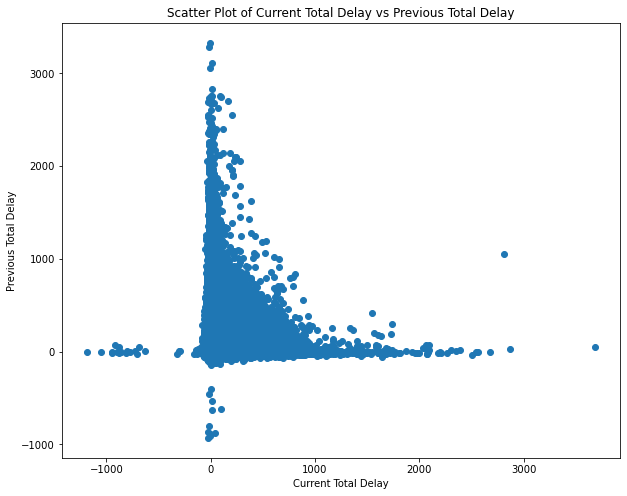

In [33]:
plt.figure(figsize=(10, 8))
plt.scatter(cascadingfailure['CurrentTotDelay'], cascadingfailure['PreviousTotDelay'])
plt.xlabel('Current Total Delay')
plt.ylabel('Previous Total Delay')
plt.title('Scatter Plot of Current Total Delay vs Previous Total Delay')
plt.show()

## Hypothesis Testing

In [34]:
#encoding the previous total delay and current total delay column
cascadingfailure["HasPreviousDelay"] = cascadingfailure["PreviousTotDelay"].apply(lambda x: 1 if x>0 else 0)
cascadingfailure["HasCurrentDelay"] = cascadingfailure["CurrentTotDelay"].apply(lambda x: 1 if x>0 else 0)
cascadingfailure

,TailNum,PreviousOrigin,PreviousDest,CurrentOrigin,CurrentDest,PreviousTotDelay,CurrentTotDelay,PreviousDateandTime,CurrentDateandTime,HasPreviousDelay,HasCurrentDelay
0,80009E,BHM,DTW,DTW,CVG,-28.0,-13.0,2007-02-09 13:00:00,2007-02-10 08:00:00,0,0
1,80009E,ICT,MEM,MEM,MGM,-8.0,-19.0,2007-02-12 22:00:00,2007-02-14 04:00:00,0,0
2,80009E,GSO,MSP,MSP,LNK,-16.0,-6.0,2007-02-20 09:00:00,2007-02-20 11:00:00,0,0
3,80009E,MGM,MEM,MEM,OMA,-24.0,-4.0,2007-02-21 21:00:00,2007-02-22 02:00:00,0,0
4,80009E,SGF,MEM,MEM,XNA,18.0,2.0,2007-02-28 16:00:00,2007-03-01 20:00:00,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1871493,NHZOAL,OGG,SMF,SMF,OGG,-18.0,-20.0,2008-02-07 22:00:00,2008-02-07 23:00:00,0,0
1871494,NHZOAL,SMF,OGG,OGG,SMF,-20.0,-31.0,2008-02-07 23:00:00,2008-02-08 21:00:00,0,0
1871495,NHZOAL,OGG,SMF,SMF,OGG,-49.0,-12.0,2008-02-09 09:00:00,2008-02-11 00:00:00,0,0
1871496,NHZOAL,SMF,OGG,OGG,SMF,-12.0,2.0,2008-02-11 00:00:00,2008-02-11 02:00:00,0,1


In [35]:
#contingency table

In [36]:
crosstab = pd.crosstab(cascadingfailure['HasPreviousDelay'], cascadingfailure['HasCurrentDelay'], margins=False)
crosstab

HasCurrentDelay,0,1
HasPreviousDelay,,
0,552241,501318
1,392122,425817


In [37]:
#performing a chi squared test to check the significance of the relationship between previous delay and current delay

In [38]:
print("Defining the hypothesis")
print("H0: There is no association between previous delays and current delays") 
print("H1: There is an association between previous delays and current delays")

Defining the hypothesis
H0: There is no association between previous delays and current delays
H1: There is an association between previous delays and current delays


In [39]:
stat, p, dof, expected = chi2_contingency(crosstab)
print("Degree of freedom: ", dof)
print("p-value: ",p)
print(expected)

Degree of freedom:  1
p-value:  0.0
[[531628.74762196 521930.25237804]
 [412734.25237804 405204.74762196]]


In [40]:
#interpreting the results

In [41]:
#testing at a 5% significance level
prob = 0.05
if p < prob:
    print("Reject H0 - There is a significant relationship")
else:
    print("Fail to reject H0 - There is no significant relationship")

Reject H0 - There is a significant relationship


In [42]:
#testing at a 1% significance level
prob = 0.01
if p < prob:
    print("Reject H0 - There is a significant relationship")
else:
    print("Fail to reject H0 - There is no significant relationship")

Reject H0 - There is a significant relationship


In [43]:
#since the H0 is rejected at both 5% and 1% significance level it can be concluded that there is strong evidence against H0